<h1>Exploratory Data Analysis</h1>
<p>In this notebook we are performing EDA on a subset of QuickDraw dataset. A github script is used to download and load a subset of dataset for 100 classes with training and testing split.</p>

<h2>About the Dataset</h2>
<p>This dataset was collected by Google from people drawing different objects. The dataset is a collection of 50 million drawings from 345 different objects that is available publically for everyone.</p>

<p><b>Downloading subset of the dataset from github repository.</b></p>

In [3]:
import urllib.request
url = 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'
filename = 'mini_classes.txt'
urllib.request.urlretrieve(url, filename)

('mini_classes.txt', <http.client.HTTPMessage at 0x2d27f369f88>)

In [4]:
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [5]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]

<p><b>Importing packages</b></p>

In [204]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

In [6]:
import urllib.request

def download():
  
    base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for c in classes:
        cls_url = c.replace('_', '%20')
        path = base+cls_url+'.npy'
        print(path)
        urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [8]:
!mkdir data

In [9]:
download() 

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

<h2>Load Data</h2>
<p>Each class contains different number samples of arrays stored as .npy format. Since we have some memory limitations we only load 5000 images per class.</p>

In [10]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [11]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

In [12]:
x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

In [100]:
 #reshape and inverse the colors 
x_train = 255 - np.reshape(x_train, (x_train.shape[0], 28, 28))

In [101]:
x_train.shape

(320000, 28, 28)

In [102]:
print(len(x_train))

320000


In [103]:
class_names

['airplane',
 'alarm_clock',
 'anvil',
 'apple',
 'axe',
 'baseball',
 'baseball_bat',
 'basketball',
 'beard',
 'bed',
 'bench',
 'bicycle',
 'bird',
 'book',
 'bread',
 'bridge',
 'broom',
 'butterfly',
 'camera',
 'candle',
 'car',
 'cat',
 'ceiling_fan',
 'cell_phone',
 'chair',
 'circle',
 'clock',
 'cloud',
 'coffee_cup',
 'cookie',
 'cup',
 'diving_board',
 'donut',
 'door',
 'drums',
 'dumbbell',
 'envelope',
 'eye',
 'eyeglasses',
 'face',
 'fan',
 'flower',
 'frying_pan',
 'grapes',
 'hammer',
 'hat',
 'headphones',
 'helmet',
 'hot_dog',
 'ice_cream',
 'key',
 'knife',
 'ladder',
 'laptop',
 'lightning',
 'light_bulb',
 'line',
 'lollipop',
 'microphone',
 'moon',
 'mountain',
 'moustache',
 'mushroom',
 'pants',
 'paper_clip',
 'pencil',
 'pillow',
 'pizza',
 'power_outlet',
 'radio',
 'rainbow',
 'rifle',
 'saw',
 'scissors',
 'screwdriver',
 'shorts',
 'shovel',
 'smiley_face',
 'snake',
 'sock',
 'spider',
 'spoon',
 'square',
 'star',
 'stop_sign',
 'suitcase',
 'sun',


<h2>Visualisation</h2>
<p><b>Visualising the categories</b></p>

t-shirt


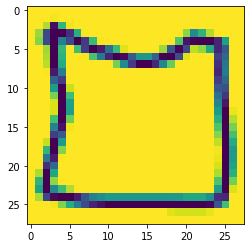

In [104]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

In [105]:
def visualize_classes_2():
    for i in range(0, 2):
        img_batch = x_train[y_train == i][0:10]
    return img_batch

In [106]:
visualize_classes_2().shape

(10, 28, 28)

In [125]:
def visualize_classes():
    for i in range(0, 50):
        img_batch = x_train[y_train == i][0:10]

        img_batch = np.reshape(img_batch, (img_batch.shape[0]*img_batch.shape[1], img_batch.shape[2]))
        if i > 0:
            img = np.concatenate([img, img_batch], axis = 1)
        else:
            img = img_batch

    plt.figure(figsize=(60,20))
    
    plt.axis('off')
    plt.imshow(img)

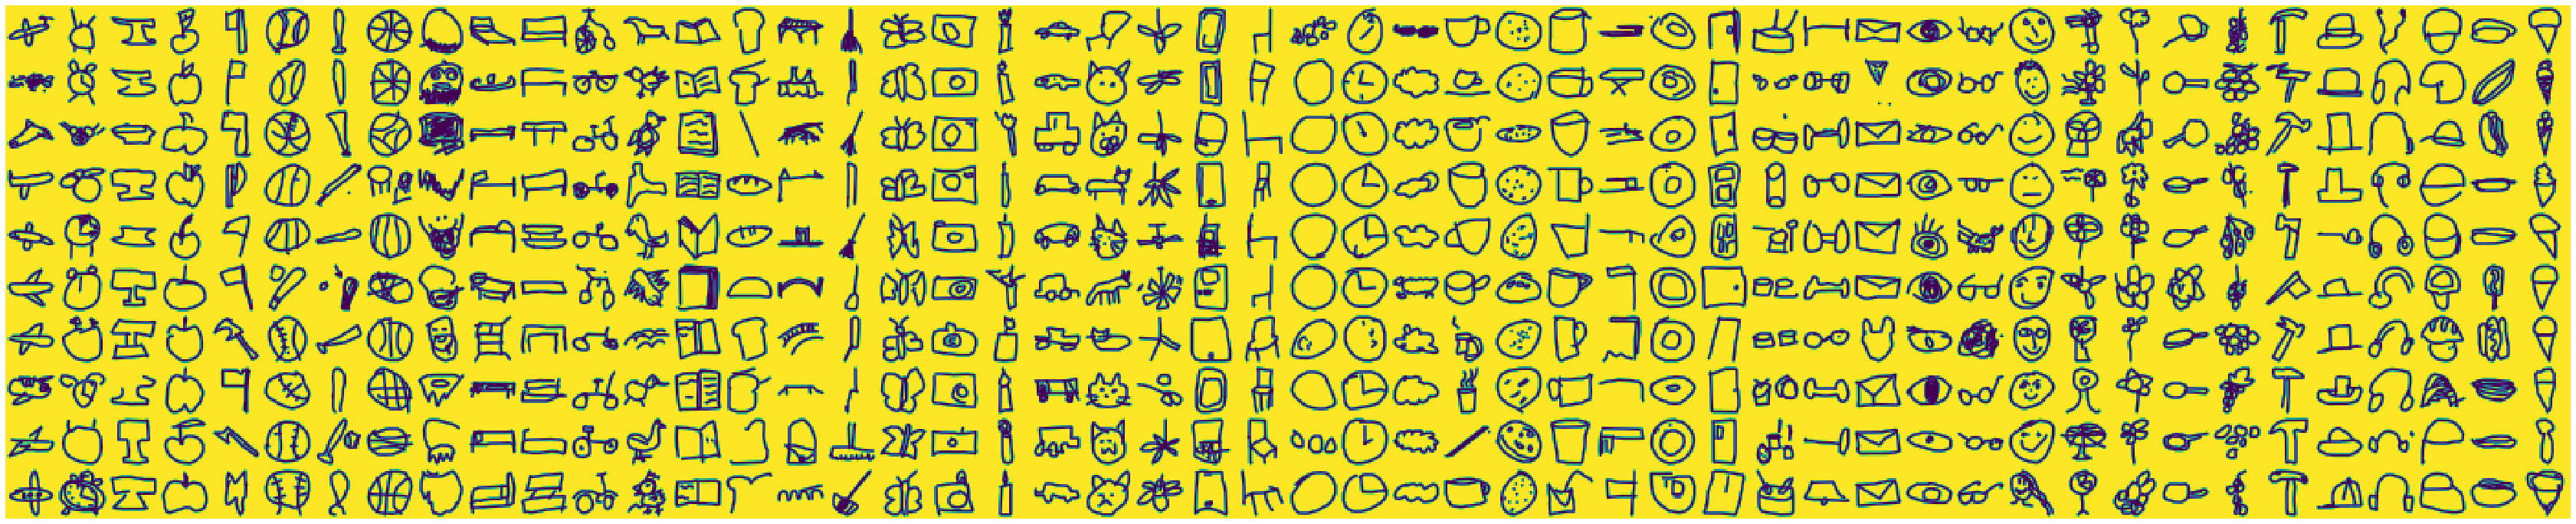

In [126]:
visualize_classes()

<h2>Distribution of Labels</h2>

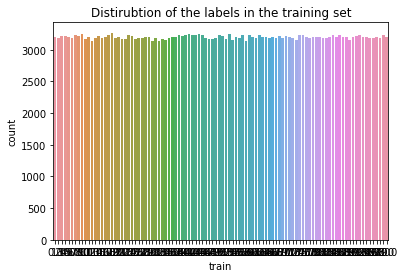

In [55]:
data = {}
data['train'] = y_train
df = pd.DataFrame.from_dict(data)
ax = sns.countplot(x = 'train', data=df).set_title("Distirubtion of the labels in the training set")

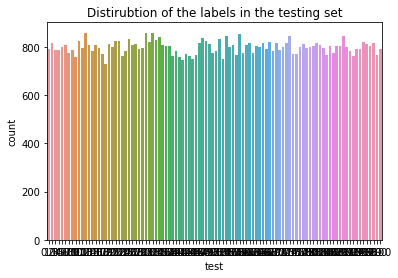

In [31]:
data = {}
data['test'] = y_test
df = pd.DataFrame.from_dict(data)
ax = sns.countplot(x = 'test', data=df).set_title("Distirubtion of the labels in the testing set")

<h2>TSNE</h2>

In [41]:
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
def plot_tsne(X, y):
    print('calculating tsne ...')
    proj = TSNE(random_state=20150101).fit_transform(X)
    scatter(proj, y)

In [42]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 100))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(100):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, class_names[i], fontsize=15)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

calculating tsne ...


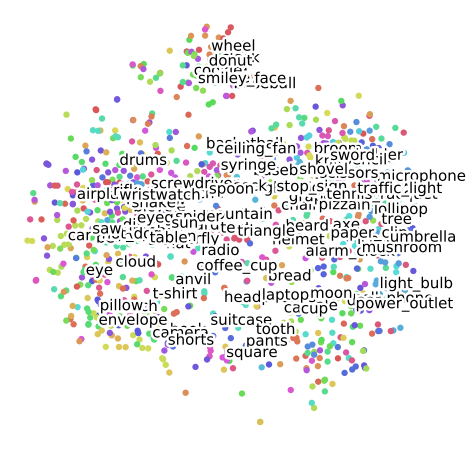

In [43]:
X = np.reshape(x_train, (x_train.shape[0], 28 * 28))[0:1000]
y = y_train[0:1000]
plot_tsne(X, y)

<h2>Feature Engineering/Extraction</h2>

<h3>Save/Load features</h3>

In [182]:
import pickle
from scipy.sparse import csr_matrix
def save_feature(feature, name):
    # saving all our feature vectors in pickled file
    with open( name + '.pkl', 'wb') as fp:
        pickle.dump(csr_matrix(feature), fp)
    
    print(f'Feature saved with name cache/{name}.pkl')

def load_feature(feature_name):
    return pickle.load(open(feature_name, 'rb')).A

<h3>Flattened Image</h3>

In [183]:
def get_flattened(images, name='flattened', save=False):
    """
    color: default RGB2GRAY, if None is passed then color is used as it is.
    """
    color_images = images
    count = len(color_images)
    
    result = np.array(color_images).reshape(count, -1)
    
    if save:
        save_feature(result, name)
        
    return result

<h3>Normalize Features</h3>

In [206]:
def norm_features_minmax(train):
    min_max_scaler = preprocessing.MinMaxScaler()
    norm_train = min_max_scaler.fit_transform(train)
    #norm_test = min_max_scaler.transform(test)
    
    return norm_train

In [207]:
def norm_features_zscore(train):
    min_max_scaler = preprocessing.StandardScaler()
    norm_train = min_max_scaler.fit_transform(train)
    #norm_test = min_max_scaler.transform(test)
    
    return norm_train

<h3>Principal Component Analysis projected data</h3>

In [217]:
def pca_projection(mat, name_arr):
    plt.figure(figsize=(10,15))
    for i, img in enumerate(mat, start=1):
        plt.subplot(3, 2, i)
        y = np.var(mat[i-1], axis=0)
        x = list(range(1, len(y)+1))
        plt.plot(x, y, '--o')
        plt.ylabel('Variance')
        plt.xlabel('Data Projected on Eigen Vector Number')
        plt.xticks(x)
        plt.title(name_arr[i-1])
    #plt.savefig(corpus+'/output/subplot.jpg')
    plt.show()

In [187]:
def draw_key_points(image, kp):
    img = cv2.drawKeypoints(image, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img

<h2>Flattening Image to greyscale to reduce the dimesions.</h2>

In [189]:
flat_gray_train = get_flattened(x_train, name='flat_gray_train', save=True)
#flat_gray_val = get_flattened(val_imgs, name='flat_gray_val', save=True)

Feature saved with name cache/flat_gray_train.pkl


In [193]:
flat_gray_train = load_feature('flat_gray_train.pkl')

In [195]:
flat_gray_train.shape, x_train.shape

((320000, 784), (320000, 28, 28))

<h2>Reduce Features by PCA</h2>

<b>Here, we are reducing features from 784 to 10 by applying PCA technique. This will help in decreasing the computational cost and increase the Model accuracy</b>

In [211]:
from sklearn.decomposition import PCA
norm_flat_gray_train = norm_features_minmax(flat_gray_train)
norm_flat_gray_train = norm_features_zscore(flat_gray_train)

In [212]:
pca = PCA(n_components=10)
pca_flat_gray_train = pca.fit_transform(norm_flat_gray_train)
#pca_flat_gray_val = pca.transform(norm_flat_gray_val)

In [214]:
pca_flat_gray_train.shape # As we can see in the output, dimensions are 320000 * 10.

(320000, 10)

<h2>Feature PCA variance comparison</h2>

In [215]:
pca_array = []
pca_array.append(pca_flat_gray_train)
len(pca_array)

1

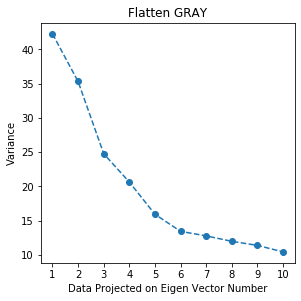

In [218]:
pca_projection(pca_array, [ 'Flatten GRAY'])